#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.4/709.4 kB 11.8 MB/s eta 0:00:00


In [ ]:
%mkdir yolov3

In [ ]:
%cd yolov3

/content/yolov3


In [ ]:
# install dependencies as necessary
# !pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.downloads import attempt_download  # to download models/datasets

# # clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


# Download Correctly Formatted Custom Dataset

We'll download our dataset from Roboflow. Use the "**COCO**" export format. Note that the Ultralytics implementation calls for a YAML file defining where your training and test data is. The Roboflow export also writes this format for us.

To get your data into Roboflow, follow the [Getting Started Guide](https://blog.roboflow.ai/getting-started-with-roboflow/).

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TsqzHhM4Hpar3s384RvS")
project = rf.workspace("computer-vision-xiyu1").project("coral-life-forms-detection")
dataset = project.version(3).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coral-Life-Forms-Detection-3 in yolov5pytorch:: 100%|██████████| 1726/1726 [00:00<00:00, 7779.83it/s]


In [ ]:
%cd /content/yolov3

/content/yolov3


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Branching
- Encrusting
- Foliose
- Massive
- Mushroom
- Submassive
- Tabulate
nc: 7
roboflow:
  license: CC BY 4.0
  project: coral-life-forms-detection
  url: https://universe.roboflow.com/computer-vision-xiyu1/coral-life-forms-detection/dataset/3
  version: 3
  workspace: computer-vision-xiyu1
test: ../test/images
train: Coral-Life-Forms-Detection-3/train/images
val: Coral-Life-Forms-Detection-3/valid/images


# Define Model Configuration and Architecture

We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
print(dataset.location)

/content/yolov3/Coral-Life-Forms-Detection-3


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov3u.yaml')  # build a new model from YAML
model = YOLO('yolov3u.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov3u.yaml').load('yolov3u.pt')  # build from YAML and transfer weights

100%|██████████| 198M/198M [00:12<00:00, 16.3MB/s]


Transferred 517/517 items from pretrained weights


# Train YOLOv8 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov3/
# !python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache


# Train the YOLOv3 model
dataset_config_path = f'{dataset.location}/data.yaml'  # Replace with your dataset configuration path
training_epochs = 100
image_size = 416
batch_size = 16
seed = 43
device = 0

results = model.train(
    data=dataset_config_path,
    project='yolov3_train',
    epochs=training_epochs,
    imgsz=image_size,
    batch=batch_size,
    device=device,
    seed=seed,
    plots=True
)


/content/yolov3
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov3u.yaml, data=/content/yolov3/Coral-Life-Forms-Detection-3/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=yolov3_train, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=43, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 68.5MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 308MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov3/Coral-Life-Forms-Detection-3/train/labels... 791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 791/791 [00:00<00:00, 1849.76it/s]

train: New cache created: /content/yolov3/Coral-Life-Forms-Detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/yolov3/Coral-Life-Forms-Detection-3/valid/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 759.88it/s]

val: New cache created: /content/yolov3/Coral-Life-Forms-Detection-3/valid/labels.cache


Plotting labels to yolov3_train/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to yolov3_train/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.94G      1.585      2.576      1.486        111        416: 100%|██████████| 50/50 [00:31<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]


                   all         33        316      0.287     0.0202   0.000797   0.000309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.13G      1.442       1.75      1.363        133        416: 100%|██████████| 50/50 [00:25<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         33        316      0.574      0.387      0.372      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.14G      1.409      1.632      1.357         79        416: 100%|██████████| 50/50 [00:25<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         33        316      0.352      0.407      0.313      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.04G      1.431      1.611      1.364        144        416: 100%|██████████| 50/50 [00:27<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]


                   all         33        316      0.526      0.419      0.393      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.13G      1.377      1.512      1.307        148        416: 100%|██████████| 50/50 [00:26<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         33        316      0.471      0.399      0.362      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.04G      1.339      1.402      1.308        114        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         33        316      0.577      0.531      0.517      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.12G      1.308      1.292       1.28        109        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         33        316      0.636      0.554      0.575      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.99G      1.256      1.261       1.25         85        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         33        316      0.641      0.492      0.548      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.13G      1.228      1.195      1.231        114        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         33        316      0.707      0.504      0.588      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.03G      1.209      1.167      1.221         68        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         33        316       0.67      0.536      0.627      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.12G       1.16      1.086      1.196         69        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         33        316      0.632      0.579      0.603      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.01G      1.149       1.06       1.19         57        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         33        316      0.771      0.534      0.634      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.14G      1.142      1.046      1.187        141        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         33        316      0.715       0.52      0.606      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.04G      1.124     0.9948      1.152        106        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         33        316      0.749      0.562      0.676      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.09G      1.078     0.9477      1.144        110        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         33        316      0.737      0.487      0.601      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         7G      1.081      0.932      1.142        105        416: 100%|██████████| 50/50 [00:27<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         33        316      0.742      0.578      0.657      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.12G      1.056     0.9075      1.131        107        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         33        316      0.681      0.571      0.671      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.97G      1.039     0.9065      1.135         78        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         33        316      0.673      0.585      0.656      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.12G      1.034     0.8587      1.114        133        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         33        316       0.65       0.58      0.641      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.99G      1.007     0.8411      1.106        109        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         33        316      0.662       0.59       0.63       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.13G     0.9928     0.8287      1.104        138        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         33        316      0.722      0.645      0.711      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         7G      1.004     0.8025      1.102        119        416: 100%|██████████| 50/50 [00:27<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]

                   all         33        316      0.706       0.58      0.647      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.11G     0.9702     0.7709      1.086        189        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         33        316      0.694      0.637      0.679      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.98G     0.9543     0.7588      1.081        152        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         33        316      0.711      0.577      0.654      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.13G     0.9408     0.7398      1.077         94        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         33        316      0.705      0.627      0.655      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.01G     0.9212     0.7169      1.057        107        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         33        316       0.74      0.582      0.674      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.15G     0.9121     0.7182      1.055        138        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         33        316      0.753      0.615      0.694       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.07G      0.899     0.6982      1.045        123        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         33        316      0.747      0.599      0.685      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.13G     0.9042      0.694      1.055         72        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         33        316      0.715      0.635      0.677      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.13G     0.8863     0.6681      1.033         92        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         33        316      0.702      0.594      0.668      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.13G     0.8734     0.6682      1.033        122        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         33        316      0.688      0.674      0.669      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.98G     0.8654      0.653      1.031        170        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         33        316      0.728      0.661      0.717      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.19G     0.8618     0.6371      1.028        101        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         33        316      0.672      0.637      0.643      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.99G     0.8446     0.6285      1.021        119        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         33        316      0.726      0.623      0.678      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.15G     0.8395     0.6152      1.019        115        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all         33        316       0.72      0.644      0.675      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.03G     0.8323     0.6163      1.009        115        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         33        316      0.682      0.611       0.65      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.15G     0.8321     0.5991      1.007        103        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         33        316       0.71      0.639      0.674       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.98G     0.8091     0.5791      1.006        119        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         33        316      0.691      0.637      0.663      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       7.2G     0.7976     0.5645     0.9926         92        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         33        316      0.767      0.601       0.66      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.13G     0.7916     0.5773     0.9952        138        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         33        316       0.71      0.605      0.655      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.12G     0.7959     0.5815     0.9893         87        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         33        316      0.705      0.616      0.662      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.99G     0.7736     0.5479      0.991         79        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         33        316      0.747      0.645      0.689      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.17G     0.7694     0.5457     0.9788        119        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all         33        316      0.725      0.613      0.671      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.04G     0.7774     0.5384     0.9883        106        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         33        316      0.724      0.667      0.689      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.13G     0.7755     0.5342     0.9753        116        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         33        316      0.699      0.654      0.692      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.01G     0.7469     0.5169     0.9725         90        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         33        316       0.75      0.591       0.66      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.12G     0.7419      0.509      0.969         96        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         33        316       0.68      0.628      0.657      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.01G     0.7395     0.5078     0.9692        107        416: 100%|██████████| 50/50 [00:26<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         33        316      0.743      0.602      0.676      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.14G     0.7292     0.5008     0.9561        119        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         33        316        0.7      0.648      0.693      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         7G     0.7339     0.5133     0.9669        148        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all         33        316      0.766       0.66      0.684      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.13G     0.7046     0.4881     0.9482        141        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all         33        316      0.745      0.645      0.693       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         7G     0.7161     0.4864     0.9532         69        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         33        316      0.746      0.638      0.693      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.14G     0.6902      0.468     0.9449        131        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         33        316      0.727       0.69      0.693      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         7G     0.7033     0.4728     0.9537        119        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         33        316      0.737      0.613      0.657      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.11G      0.703     0.4762     0.9457        127        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         33        316      0.763      0.643      0.671      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.07G     0.6686     0.4599       0.94         56        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         33        316      0.746      0.623      0.693      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.16G     0.6918     0.4699     0.9417        115        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         33        316      0.708      0.692       0.71       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.15G     0.6603     0.4374     0.9392        138        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         33        316      0.763      0.649      0.691      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.18G     0.6702     0.4417     0.9388        139        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         33        316      0.714      0.687      0.702      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.12G     0.6675      0.444     0.9435        129        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         33        316      0.728      0.635       0.67      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.15G     0.6614     0.4407     0.9356        128        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         33        316      0.745      0.629      0.698      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.97G     0.6449     0.4251     0.9314        135        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         33        316      0.746      0.646      0.706      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.17G     0.6425      0.425     0.9317         68        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         33        316      0.731      0.613      0.666      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.18G      0.634     0.4152     0.9263        135        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         33        316      0.757      0.579      0.695      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.16G      0.645      0.416     0.9251        125        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all         33        316      0.773      0.649      0.712      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.13G     0.6299     0.4111     0.9216        103        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         33        316      0.766      0.671      0.713      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.11G     0.6233     0.4006     0.9239         73        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         33        316      0.772      0.615      0.687      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.01G     0.6236     0.4045     0.9193         81        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]

                   all         33        316      0.771      0.617      0.684        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.14G     0.6024     0.3886     0.9113        108        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         33        316      0.748      0.643      0.681      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.01G     0.6132     0.3971     0.9153         74        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         33        316      0.778      0.658      0.702      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.13G      0.601     0.3785     0.9078         85        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         33        316      0.736      0.619      0.675        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.14G     0.5992     0.3877     0.9095         99        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         33        316      0.765      0.612       0.66       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.15G     0.5923     0.3763     0.9094        112        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         33        316      0.726      0.641      0.674      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.04G     0.5963     0.3812     0.9151         75        416: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         33        316      0.712      0.658      0.682      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.14G     0.5784     0.3703     0.9035        102        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.47it/s]

                   all         33        316      0.706      0.657      0.681      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.02G     0.5803     0.3696      0.904        130        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         33        316      0.733      0.658      0.682      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.15G     0.5808     0.3732     0.9058        105        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         33        316      0.717      0.688      0.716      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.14G     0.5656     0.3562     0.8943        110        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         33        316      0.778      0.628      0.712      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.15G     0.5639     0.3592     0.8983        142        416: 100%|██████████| 50/50 [00:27<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         33        316       0.77      0.632      0.695      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.16G      0.561      0.353     0.8965        129        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         33        316      0.754      0.647      0.695      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.17G     0.5578      0.352     0.8938        140        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         33        316      0.756      0.666      0.718       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.16G     0.5456     0.3421     0.8922        157        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         33        316      0.675      0.705      0.709      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.18G     0.5489     0.3495     0.8922         77        416: 100%|██████████| 50/50 [00:27<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all         33        316      0.726      0.665       0.69      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.14G     0.5365     0.3406     0.8855         65        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         33        316      0.721      0.662      0.683      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.18G     0.5277     0.3301     0.8872         83        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         33        316      0.743       0.64      0.695       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.05G      0.536     0.3357      0.891         82        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         33        316        0.7      0.684      0.706      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.16G     0.5373     0.3348     0.8888        145        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         33        316      0.772      0.625      0.699      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.02G      0.524     0.3264     0.8837        163        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         33        316      0.778      0.651       0.71      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.16G      0.523      0.326     0.8809        125        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         33        316      0.758      0.655      0.713      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.16G      0.521     0.3212     0.8858        161        416: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         33        316      0.723      0.658      0.722      0.527


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.26G     0.5066     0.3093     0.8621         66        416: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         33        316      0.754      0.654      0.725      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.26G     0.4818     0.2844      0.853         40        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all         33        316      0.743      0.649      0.709      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.25G     0.4745     0.2677       0.85         43        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         33        316      0.722      0.655      0.708       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.25G     0.4697     0.2684     0.8452         64        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         33        316      0.764      0.652      0.715      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.24G     0.4504      0.256     0.8452         30        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]

                   all         33        316      0.705      0.695      0.717      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.11G     0.4488     0.2557     0.8367         40        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         33        316      0.741      0.654      0.716      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.23G     0.4529     0.2542     0.8405        118        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]

                   all         33        316      0.766      0.639      0.704      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.25G     0.4496     0.2592      0.844         84        416: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         33        316      0.722      0.667      0.705      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.23G     0.4367     0.2452     0.8386         70        416: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all         33        316      0.733      0.671      0.707      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.08G     0.4347     0.2468     0.8376         80        416: 100%|██████████| 50/50 [00:26<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         33        316      0.737      0.657      0.698      0.526



100 epochs completed in 0.990 hours.
Optimizer stripped from yolov3_train/train2/weights/last.pt, 207.7MB
Optimizer stripped from yolov3_train/train2/weights/best.pt, 207.7MB

Validating yolov3_train/train2/weights/best.pt...
Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3u summary (fused): 226 layers, 103669637 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]


                   all         33        316      0.741      0.654      0.715      0.534
             Branching         33         93      0.805      0.709      0.763      0.539
            Encrusting         33         50      0.795      0.622      0.719      0.518
               Foliose         33         11      0.506      0.455      0.465       0.43
               Massive         33         73       0.62      0.438      0.616      0.439
              Mushroom         33         40      0.848        0.8      0.874      0.647
            Submassive         33         18      0.931      0.746      0.877      0.705
              Tabulate         33         31      0.685      0.806      0.691      0.464
Speed: 0.3ms preprocess, 9.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to yolov3_train/train2
CPU times: user 41min 9s, sys: 6min 33s, total: 47min 43s
Wall time: 1h 3s


# Evaluate Custom YOLOv3 Detector Performance

In [ ]:
# Validate the model
metrics_train = model.val(split='train')  # no arguments needed, dataset and settings remembered

print("mAP (50-95):", metrics_train.box.map)
print("mAP50:", metrics_train.box.map50)
print("mAP75:", metrics_train.box.map75)
print("mAPs for each category:", metrics_train.box.maps)

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv3u summary (fused): 226 layers, 103669637 parameters, 0 gradients, 282.2 GFLOPs


val: Scanning /content/yolov3/Coral-Life-Forms-Detection-3/train/labels.cache... 791 images, 0 backgrounds, 0 corrupt: 100%|██████████| 791/791 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:19<00:00,  2.54it/s]


                   all        791       6851      0.985      0.974      0.987      0.914
             Branching        791       1902      0.985      0.994      0.995      0.928
            Encrusting        791        725      0.987      0.992      0.994      0.947
               Foliose        791        267       0.99          1      0.992      0.967
               Massive        791       1642      0.985      0.998      0.995      0.942
              Mushroom        791        943      0.964      0.849       0.94      0.725
            Submassive        791        514      0.998          1      0.995      0.969
              Tabulate        791        858      0.984      0.988      0.995      0.921
Speed: 0.1ms preprocess, 12.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov3_train/train22
mAP (50-95): 0.9141099651175283
mAP50: 0.9865989701057184
mAP75: 0.9715769136300217
mAPs for each category: [    0.92802     0.94699     0.96719     0.94165     0.7246

In [ ]:
# Validate the model
metrics_val = model.val()  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov3/Coral-Life-Forms-Detection-3/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.29s/it]


                   all         33        316      0.741      0.654      0.716      0.536
             Branching         33         93      0.805      0.708      0.763      0.542
            Encrusting         33         50      0.795      0.622      0.725      0.517
               Foliose         33         11      0.507      0.455      0.467      0.432
               Massive         33         73      0.621      0.438      0.616      0.443
              Mushroom         33         40      0.848        0.8      0.874      0.647
            Submassive         33         18      0.931      0.746      0.877      0.703
              Tabulate         33         31      0.685      0.806      0.692      0.465
Speed: 0.1ms preprocess, 41.1ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to yolov3_train/train23


In [ ]:
print("mAP (50-95):", metrics_val.box.map)
print("mAP50:", metrics_val.box.map50)
print("mAP75:", metrics_val.box.map75)
print("mAPs for each category:", metrics_val.box.maps)

mAP (50-95): 0.5355203651303719
mAP50: 0.7164321607598013
mAP75: 0.6213783591570271
mAPs for each category: [    0.54183     0.51718     0.43185      0.4428     0.64692     0.70333     0.46473]


In [ ]:
# Validate the model
metrics = model.val(split="test")  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.1.8 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov3/Coral-Life-Forms-Detection-3/test/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 416.34it/s]

val: New cache created: /content/yolov3/Coral-Life-Forms-Detection-3/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]


                   all         33        288      0.816      0.778       0.81      0.644
             Branching         33         59      0.749       0.81      0.826      0.587
            Encrusting         33         47      0.881      0.787      0.807      0.631
               Foliose         33         21      0.937      0.712      0.817      0.706
               Massive         33         85      0.779      0.704      0.739      0.539
              Mushroom         33         38      0.684      0.632      0.685       0.52
            Submassive         33         16      0.896      0.938      0.921      0.796
              Tabulate         33         22      0.785      0.864      0.878      0.729
Speed: 0.1ms preprocess, 20.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to yolov3_train/train24


In [ ]:
print("mAP (50-95):", metrics.box.map)
print("mAP50:", metrics.box.map50)
print("mAP75:", metrics.box.map75)
print("mAPs for each category:", metrics.box.maps)

mAP (50-95): 0.6439848698406766
mAP50: 0.8103548316376047
mAP75: 0.7312453926162986
mAPs for each category: [    0.58676     0.63111     0.70578      0.5394     0.52033     0.79555     0.72897]


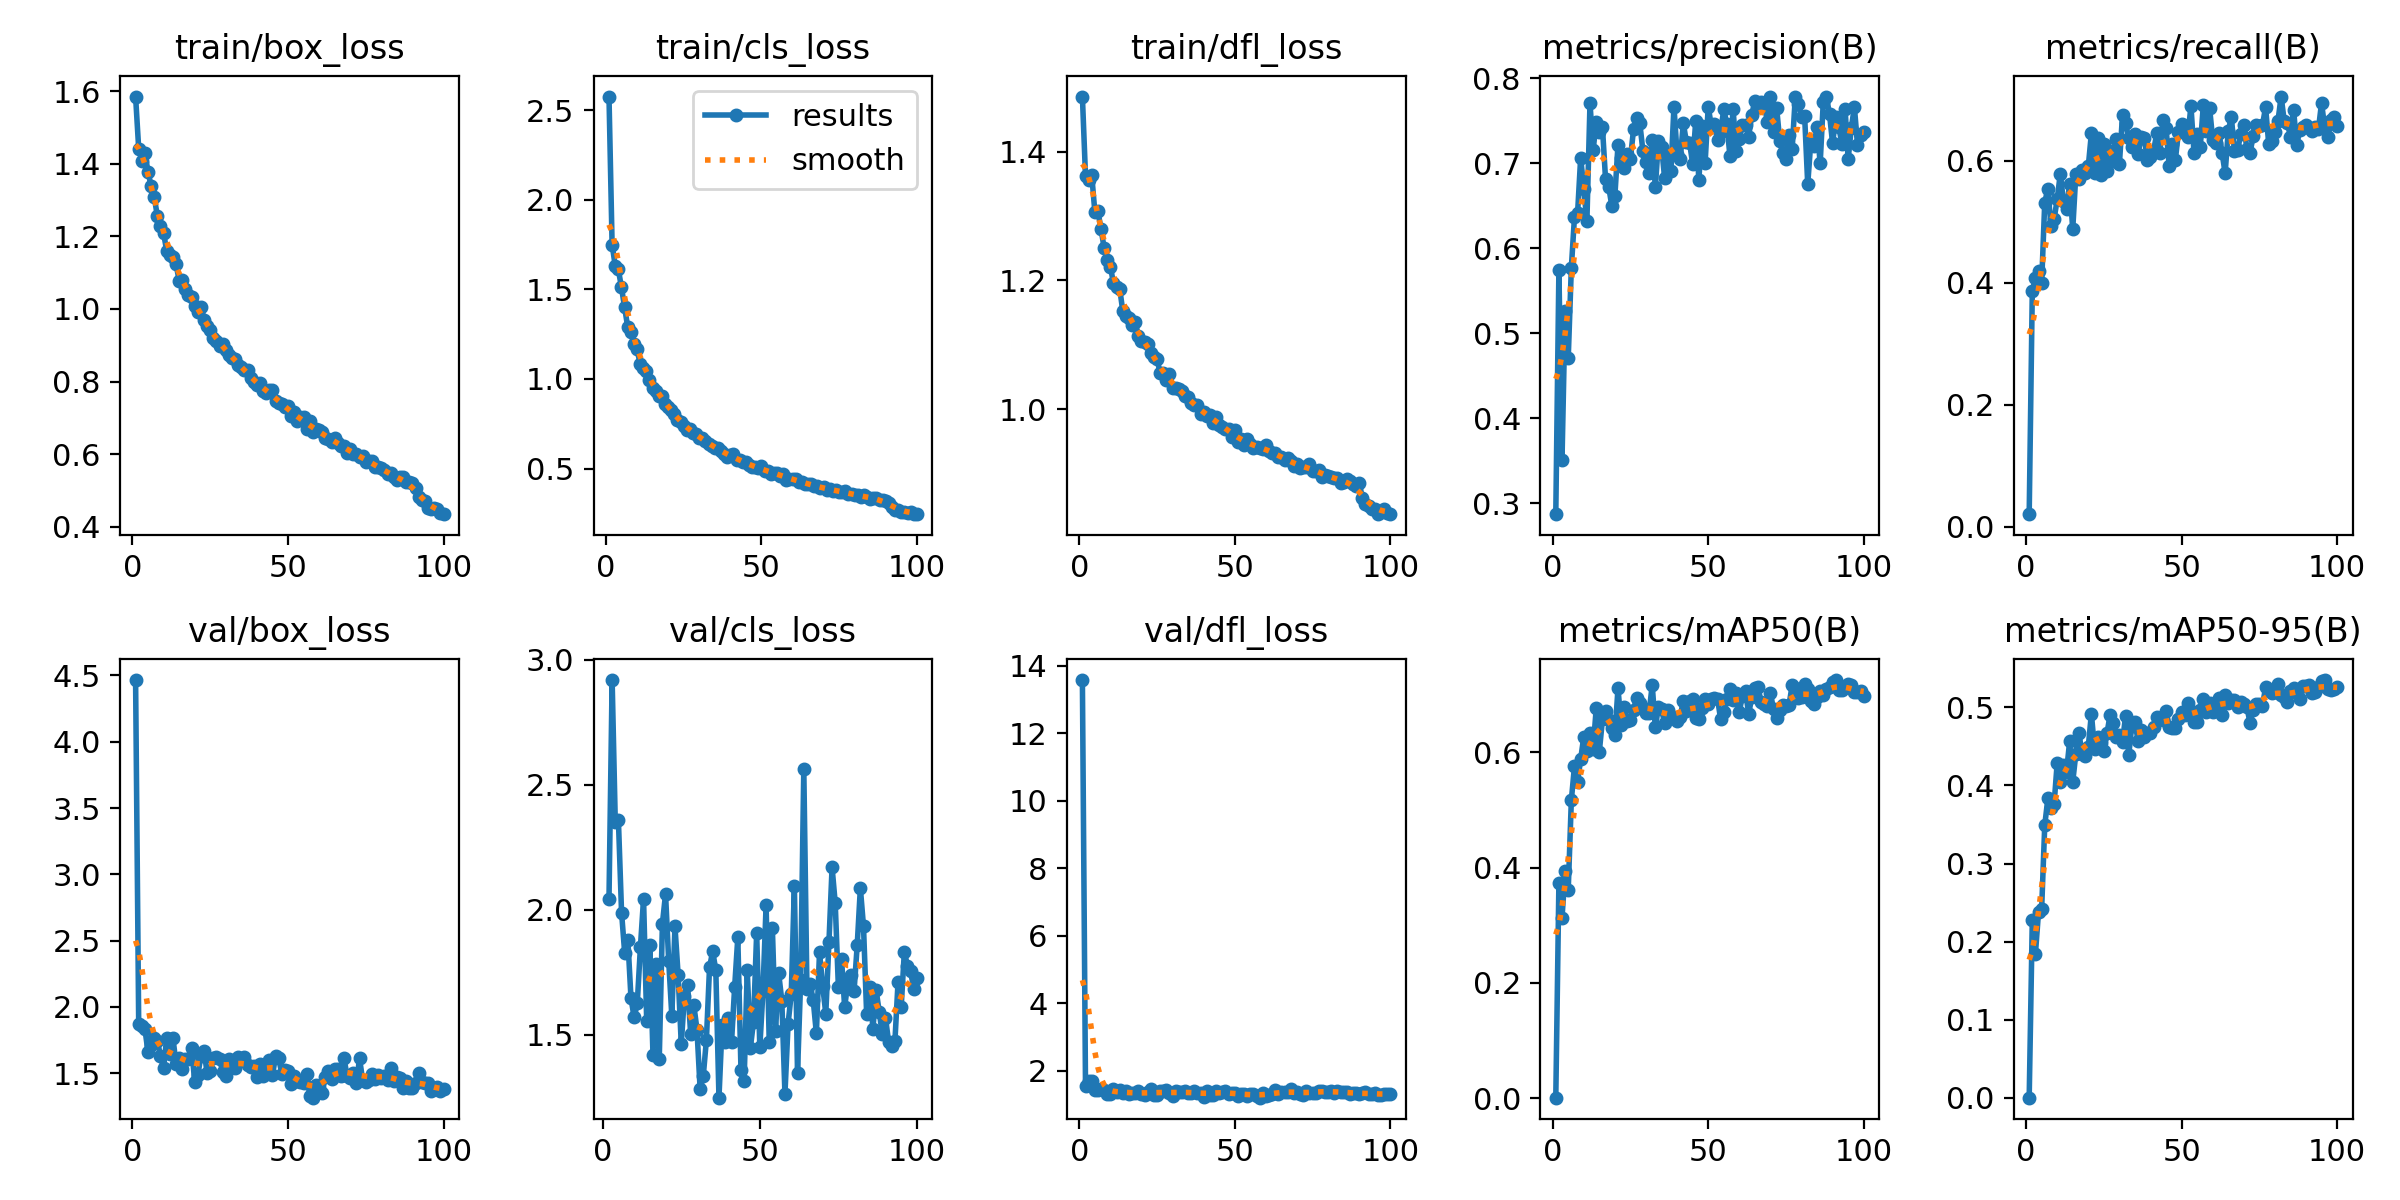

In [ ]:
# # we can also output some older school graphs if the tensor board isn't working for whatever reason...
# from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov3/yolov3_train/train2/results.png', width=1000)  # view results.png

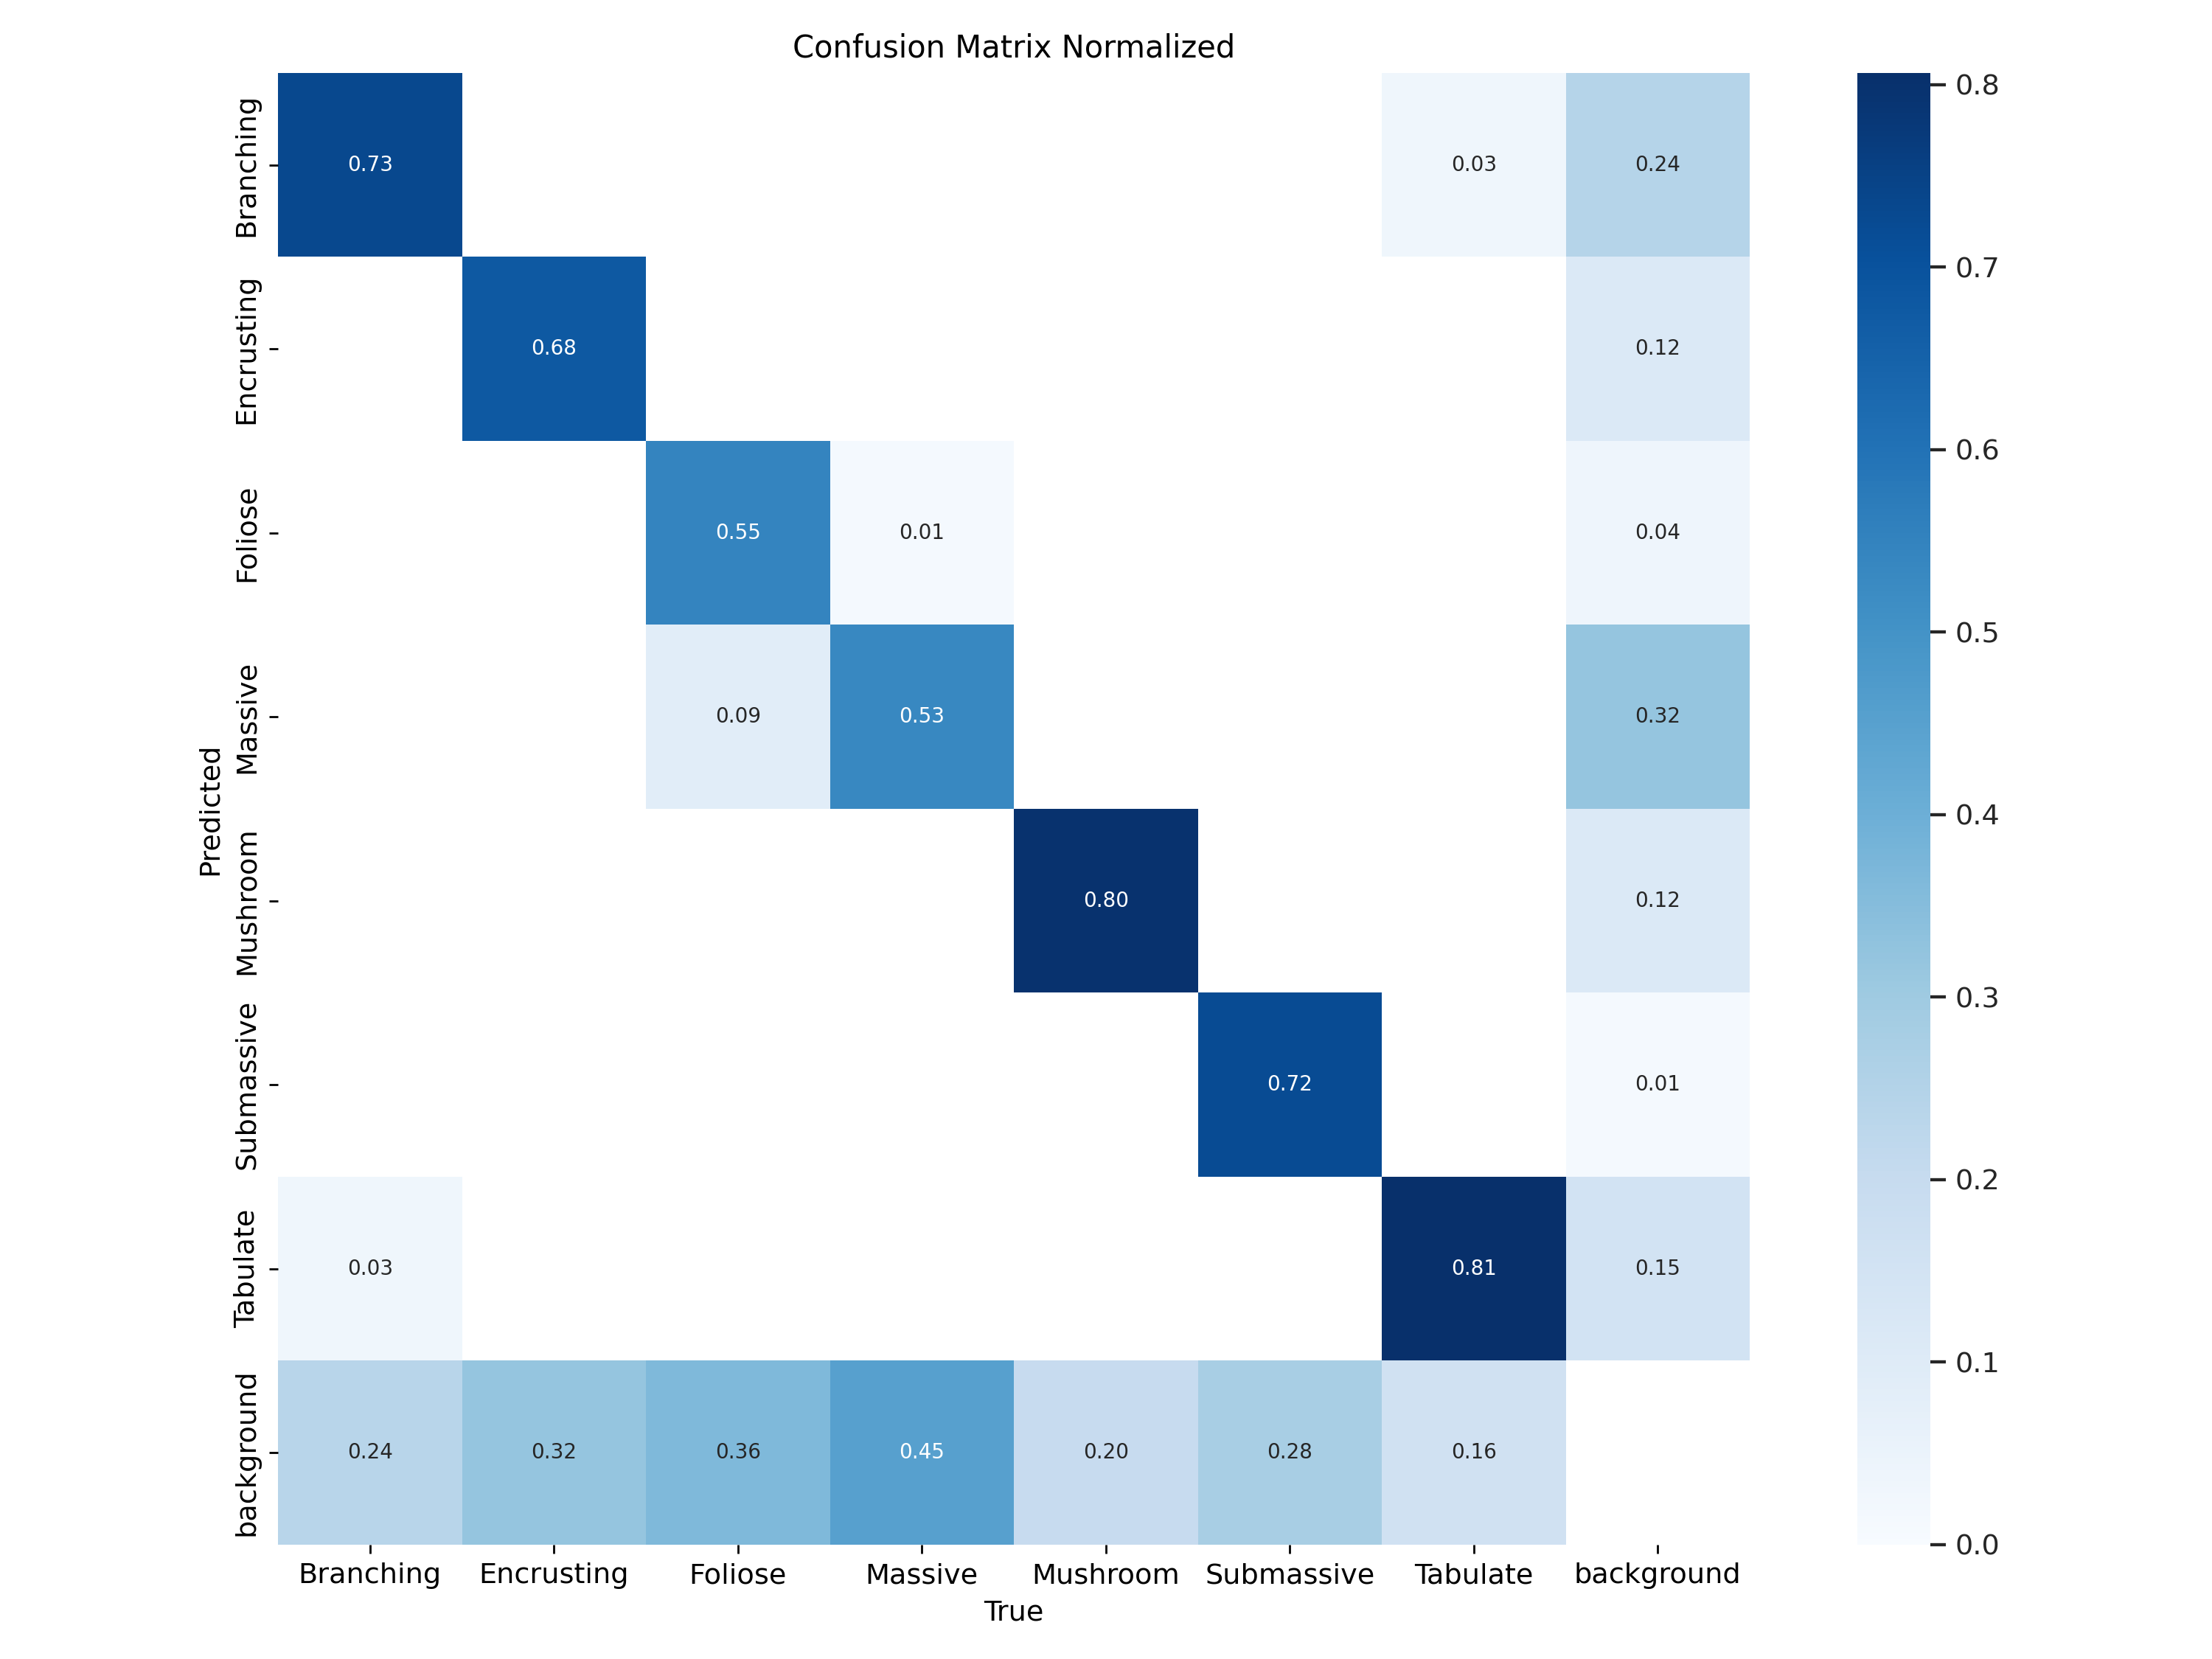

In [ ]:
#Confusion matrix is the chart that shows how the model handles different classes
Image(filename='/content/yolov3/yolov3_train/train2/confusion_matrix_normalized.png', width=1000)

### Visualize Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.


GROUND TRUTH TRAINING DATA:


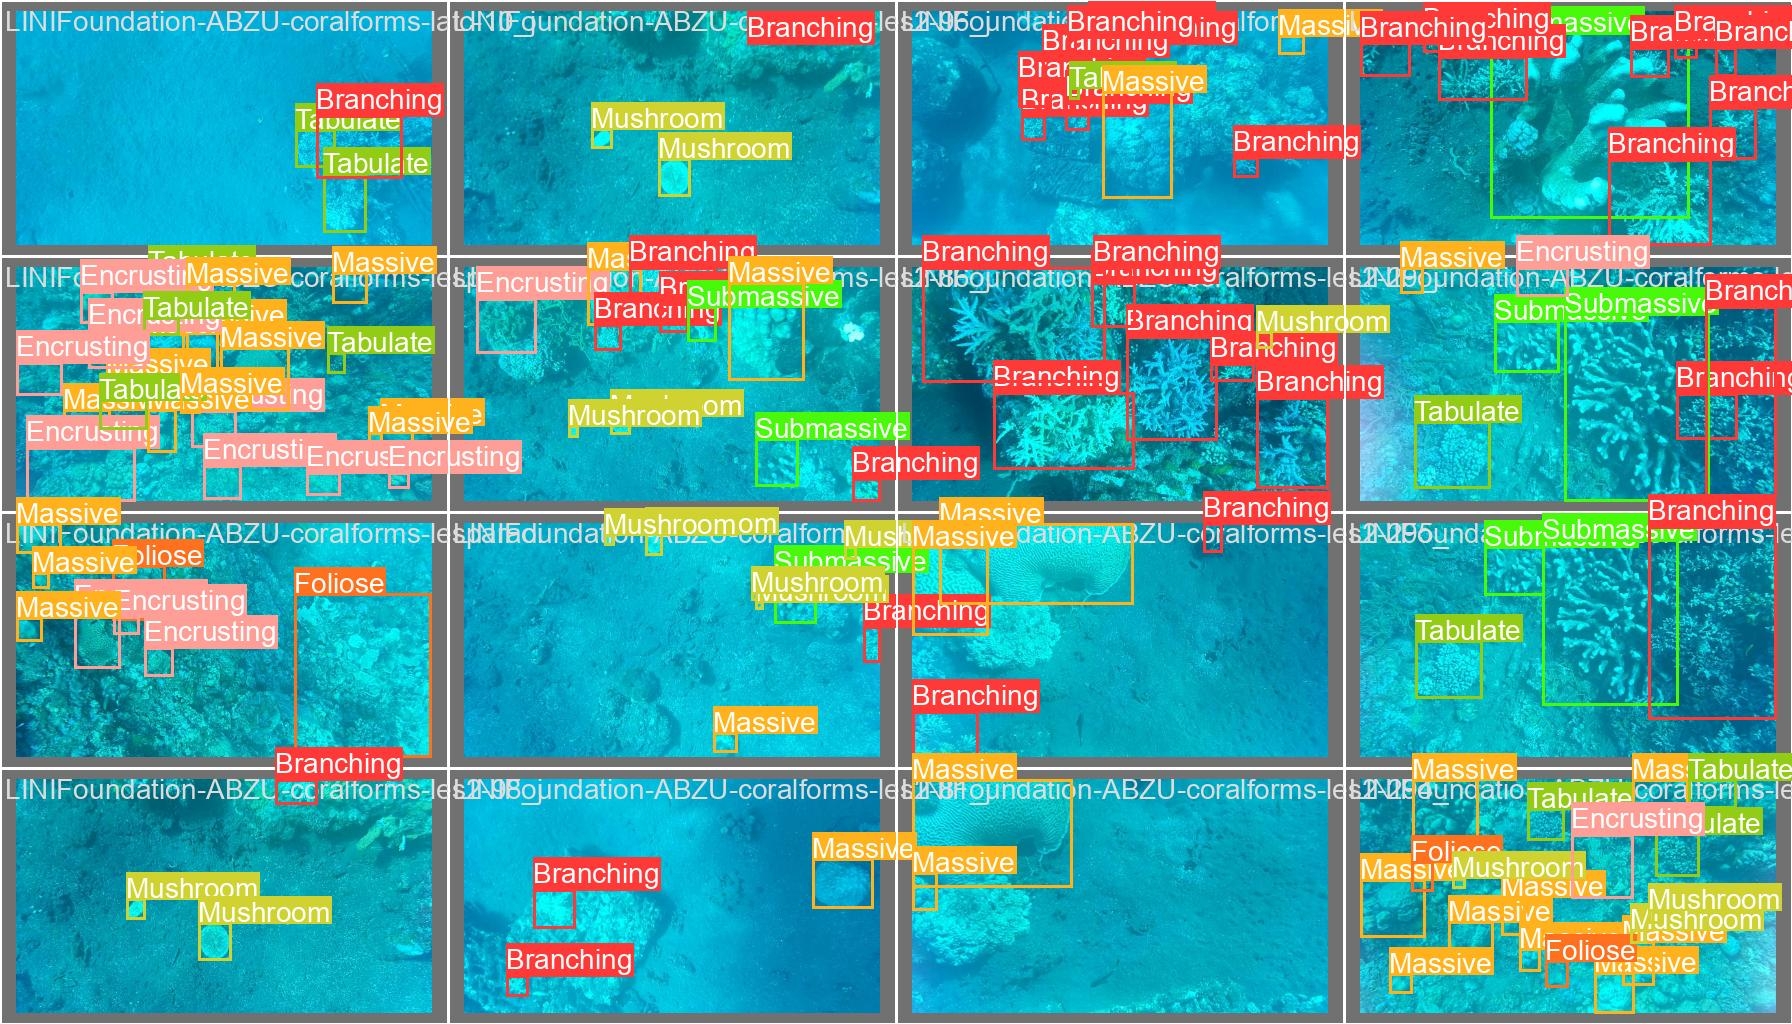

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov3/yolov3_train/train2/val_batch0_labels.jpg', width=1000)

GROUND TRUTH AUGMENTED TRAINING DATA:


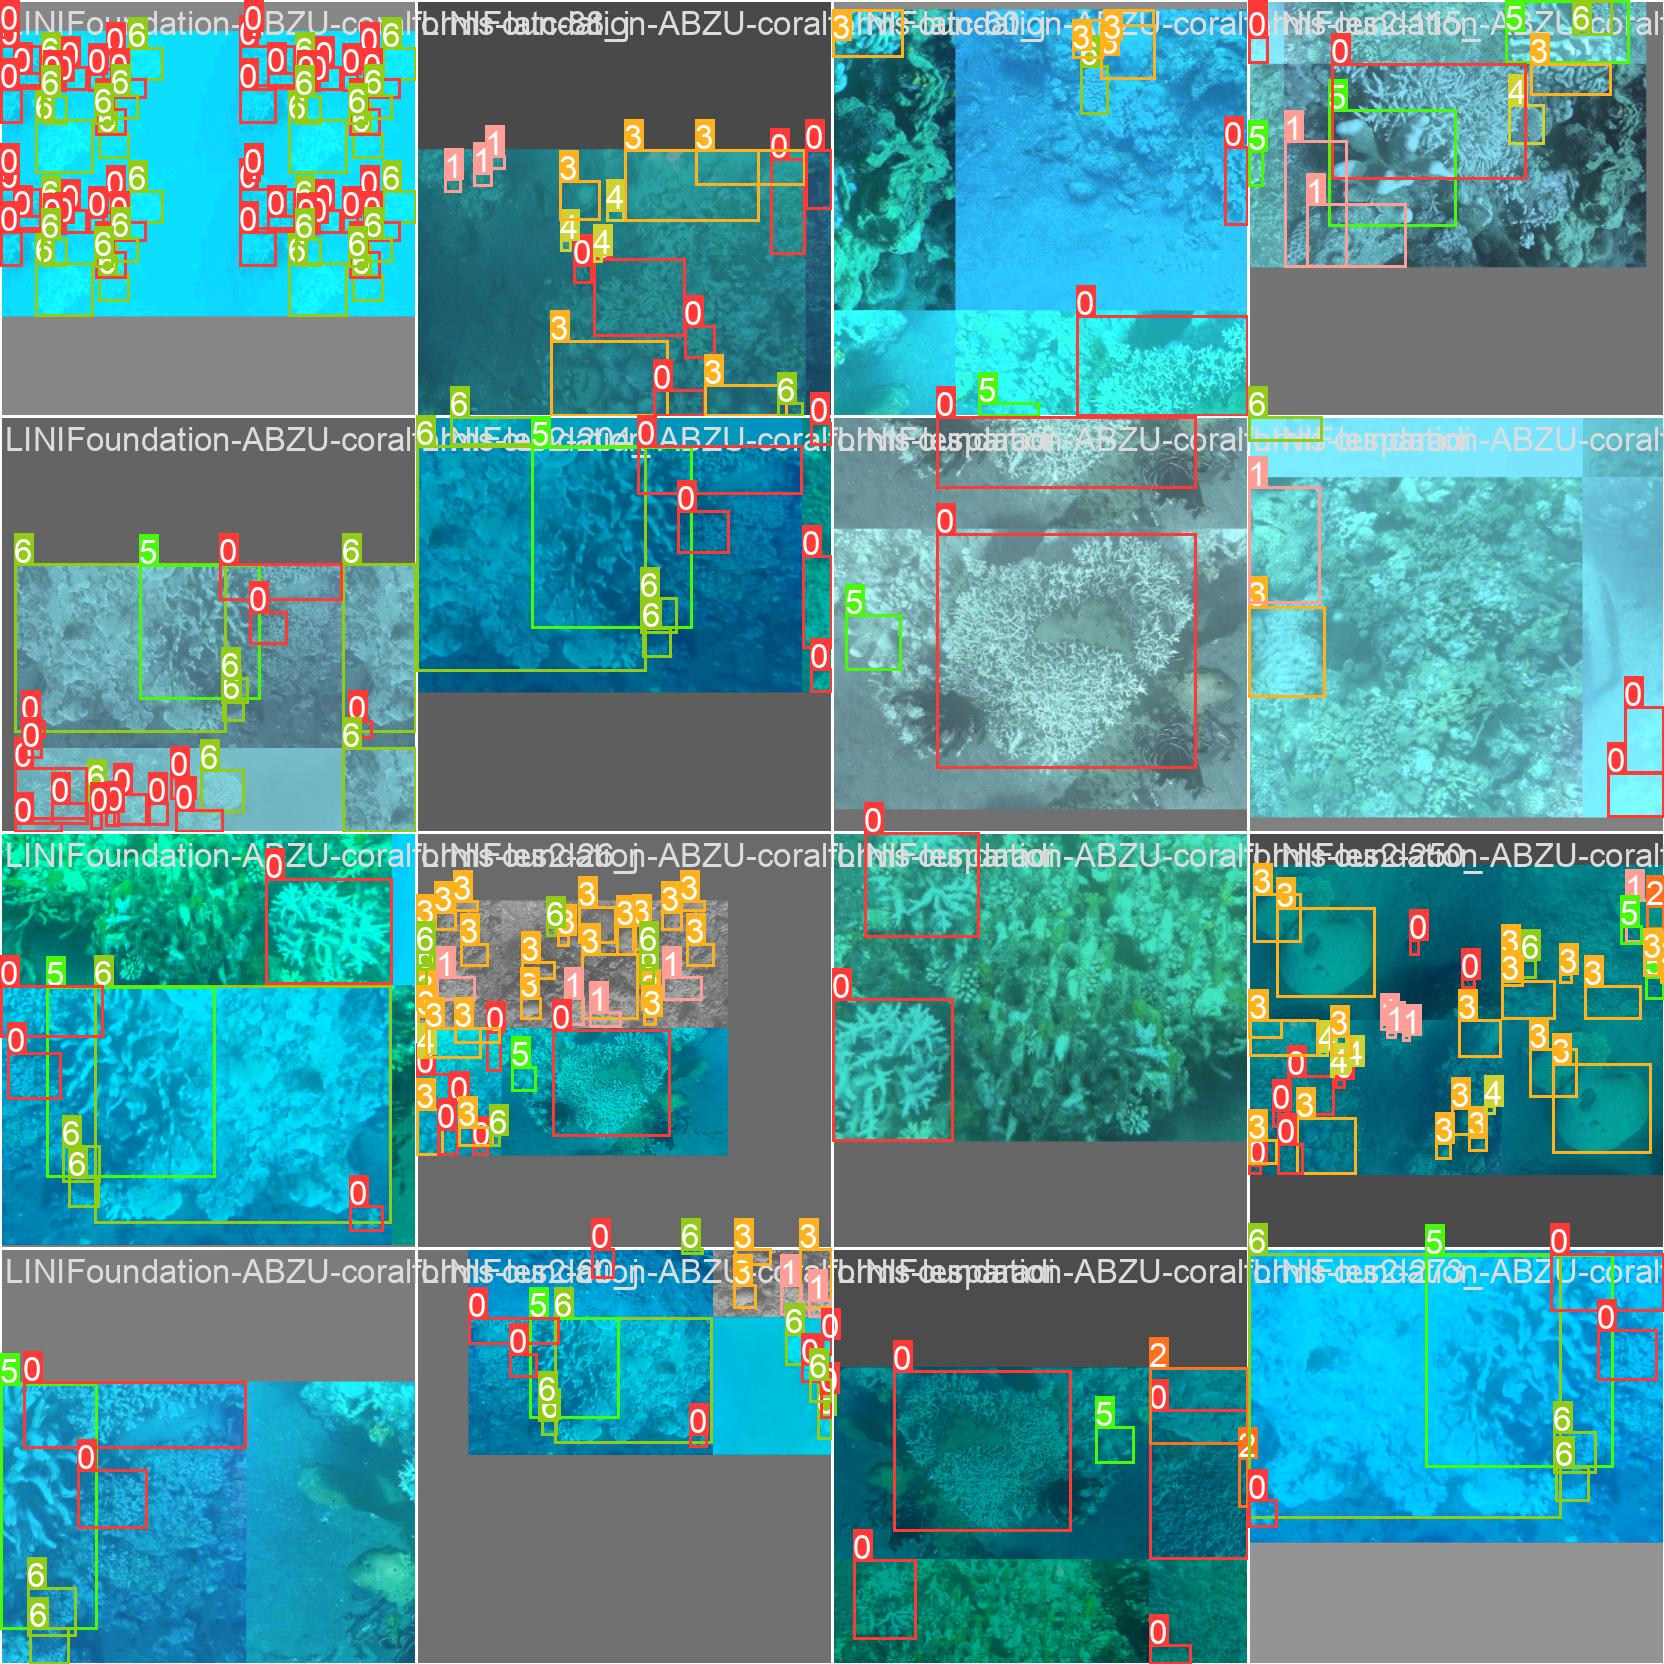

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov3/yolov3_train/train2/train_batch0.jpg', width=1000)

Validation Predict:


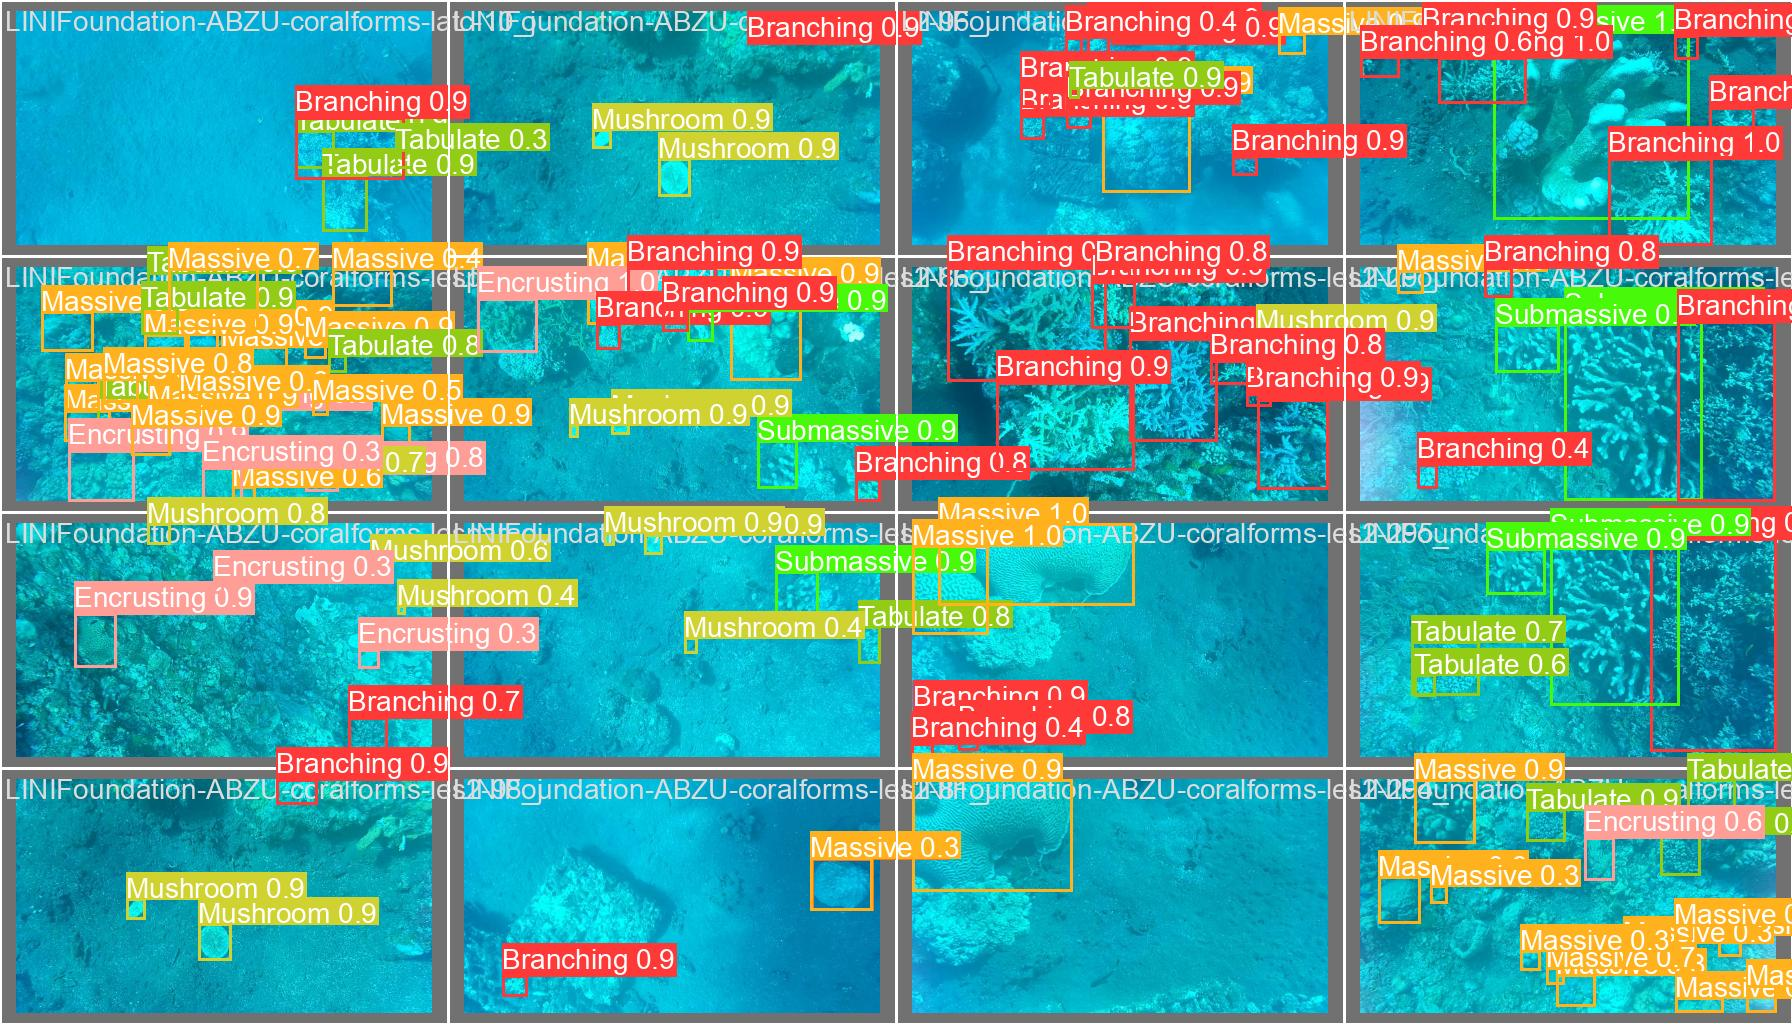

In [ ]:
# print out the prediction
print("Validation Predict:")
Image(filename='/content/yolov3/yolov3_train/train2/val_batch0_pred.jpg', width=1000)

# Export Trained Weights for Future Inference

Now that you have trained your custom detector, you can export the trained weights you have made here for inference on your device elsewhere

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## run this if got error encoding

# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
# %cd /content/yolov5/
# !python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/gdrive/MyDrive/abzu-oakd-record/les2-1.mov

In [ ]:
# %cp /content/yolov5/runs/detect/exp3/les2-1.mp4 /content/drive/MyDrive/AI_bootcamp

In [ ]:
%cp /content/yolov3/yolov3_train/train2/weights/best.pt /content/drive/MyDrive/cv_bootcamp_indonesiaai/final_project/models/yolov3u